# PCA Plots

## General settings and loading files

In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~30s to run if it finds the dumpfiles
# ^ Will take 2.1 Gb


[09:49:19] 'panels' dict
[09:49:19] 'galanter', 'present', 'missing' dataframes
[09:49:19] 'panel_labels'
[09:49:19] 'panel_names' dict
[09:49:19] 'genome' dataframe
[09:49:26] 'lat' dataframe
[09:49:38] 'control_genotypes' dict of dataframes
[09:49:38] 'cp_factors' list
[09:49:38] 'control_names' dict
[09:49:38] 'df_1000G_samples'
[09:49:38] 'df_1000G_SNPs'
[09:49:38] 'df_1000G_genotypes'
[09:49:38] 'df_1000G_populations'
[09:49:38] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/settings/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[09:49:38] 'mafs' dataframe
=> You should check your RAM! <=


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

In [2]:
from collections import OrderedDict
from os.path import join

DATASETS_DIR = "/home/juan/tesina/dataset_dumps/"


def sample_IDs_from_popcode(pop_dict):  
    populations = []
    for label, pop_list in pop_dict.items():
        mask = df_1000G_samples.population.isin(pop_list)
        populations.append(df_1000G_samples[mask])

    return pd.concat(populations).index

dataset_names = {
    "L": "Latinos",
    "LE": "Latinos, Europeos",
    "LEA": "Latinos, Europeos, Africanos",
    "LEAC": "Latinos, Europeos, Africanos, Chinos",
    "LEACI": "Latinos, Europeos, Africanos, Chinos, Indios",
}

# I could export some of these to .yaml ?

latinos = {'latinos': ['PEL', 'MXL', 'CLM', 'PUR']}
e = {'europeans': ['IBS', 'GBR']}
ea = {**e, **{'africans': ['YRI', 'LWK']}}
eac = {**ea, **{'east_asians': ['CHB', 'CHS']}}
eaci = {**eac, **{'south_asians': ['GIH']}}

samples = OrderedDict()
samples["L"] = latinos
samples["LE"] = {**e, **latinos}
samples["LEA"] = {**ea, **latinos}
samples["LEAC"] = {**eac, **latinos}
samples["LEACI"] = {**eaci, **latinos}

# Transform population codes into 1000 Genome sample IDs
# And write the sample IDs list to a file with the dataset name
for dataset_label, pop_dict in samples.items():
    samples[dataset_label] = sample_IDs_from_popcode(pop_dict)
    filename = join(DATASETS_DIR, dataset_label) + ".samples"
    samples[dataset_label].values.tofile(filename, sep="\n", format="%s")

In [3]:
# Memory hog! Will eat ~2Gb RAM if control_3_genotypes is combined.
# all_controls = control_genotypes.combine_first(control_2_genotypes).combine_first(control_3_genotypes)
# all_controls.shape

## Plot settings

In [5]:
import yaml

plot_colors = yaml.load(open("./settings/plot_colors.yml", "r"))
plot_markers = yaml.load(open("./settings/plot_markers.yml", "r"))

In [10]:
rsIDs_per_panel = OrderedDict()

for panel_label, panel in panels.items():
    name = panel_names[panel_label]
    rsIDs_per_panel[name] = panel.index

# for factor in cp_factors:
#     name = control_names[factor]
#     rsIDs_per_panel[name] = control_genotypes[factor].columns

## PCA plot

0
1


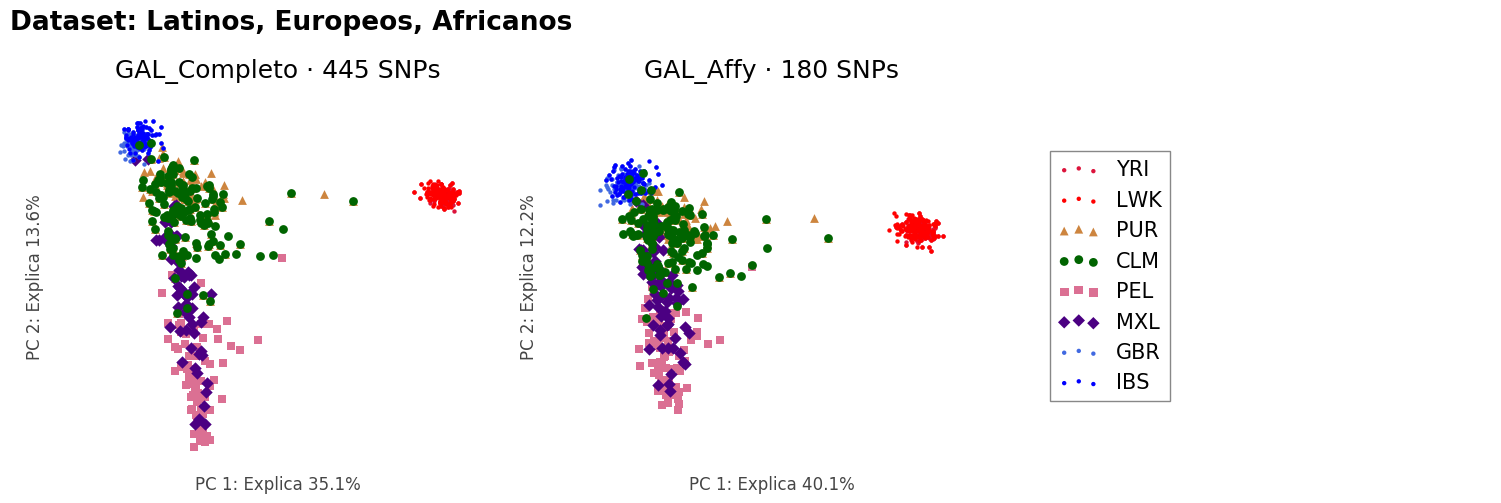

[PCA(copy=True, n_components=None, whiten=False),
 PCA(copy=True, n_components=None, whiten=False)]

In [43]:
from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()

# for dataset_label, sample_ids in datasets.items():
dataset_label = "LEA"
sample_ids = samples["LEA"]
dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]  # ":" for all SNPs

# Generate title outside of the function

pca_plotter.plot(dataset_label, dataset_names[dataset_label],
                 rsIDs_per_panel, dataset_genotypes,
                 df_1000G_samples,
                 plot_markers, plot_colors)

In [ ]:
%run plot_PCAs.py

RUN_PCA = False

all_genotypes = df_1000G_genotypes.combine_first(all_controls)

for dataset_label, indices in datasets_general.items():
    if not RUN_PCA:
        continue

    genotypes = all_genotypes.loc[indices, :]
    
    pca = plot_PCAs(dataset_label, panel_indices, genotypes,
                    df_1000G_sample_populations,
                    plot_markers, plot_colors)